# Importing Librairies first and we will be importing different datasets that I downloaded from fbref following this video on how to get data from fbref : https://www.youtube.com/watch?v=fuNQRKSAwWg&ab_channel=McKayJohns 

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import json
import re

## First we will start with the team stats that contains goals assists expected goals expected assists penalty goals and non penalty goals

In [2]:
datafor=pd.read_excel('data/World Cup Team Stats.xlsx')
datafor

,Team,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,...,G+A-PK/90,xG,npxG,xAG,npxG+xAG,xG /90,xAG /90,xG+xAG /90,npxG /90,npxG+xAG /90
0,Argentina,ar Argentina,24,27.5,57.4,7,77,690,7.7,15,...,2.48,15.1,11.3,7.7,19.0,1.96,1.00,2.97,1.47,2.48
1,Australia,au Australia,20,27.8,37.8,4,44,360,4.0,3,...,1.50,2.3,2.3,1.9,4.2,0.58,0.48,1.06,0.58,1.06
2,Belgium,be Belgium,20,29.7,57.0,3,33,270,3.0,1,...,0.67,4.7,4.7,3.8,8.5,1.57,1.27,2.85,1.57,2.85
3,Brazil,br Brazil,26,27.6,56.2,5,55,480,5.3,8,...,2.44,12.0,11.2,8.2,19.4,2.24,1.54,3.79,2.09,3.64
4,Cameroon,cm Cameroon,22,27.2,41.7,3,33,270,3.0,4,...,2.67,3.4,3.4,2.0,5.4,1.14,0.66,1.80,1.14,1.80
5,Canada,ca Canada,19,27.3,52.0,3,33,270,3.0,1,...,0.67,4.2,3.6,2.8,6.4,1.41,0.95,2.35,1.18,2.13
6,Costa Rica,cr Costa Rica,22,29.7,31.3,3,33,270,3.0,3,...,1.33,1.4,1.4,0.6,2.0,0.48,0.20,0.68,0.48,0.68
7,Croatia,hr Croatia,21,28.3,54.3,7,77,690,7.7,8,...,2.09,7.0,7.0,5.6,12.6,0.91,0.74,1.65,0.91,1.65
8,Denmark,dk Denmark,20,26.6,60.0,3,33,270,3.0,1,...,0.67,2.7,2.7,1.8,4.5,0.90,0.59,1.49,0.90,1.49
9,Ecuador,ec Ecuador,18,24.9,53.3,3,33,270,3.0,4,...,1.67,3.7,2.9,1.8,4.7,1.24,0.60,1.84,0.98,1.58


In [3]:
datafor.columns

Index(['Team', 'Squad', '# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s',
       'Gls', 'Ast', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls /90',
       'Ast /90', 'G+A /90', 'G-PK/90', 'G+A-PK/90', 'xG', 'npxG', 'xAG',
       'npxG+xAG', 'xG /90', 'xAG /90', 'xG+xAG /90', 'npxG /90',
       'npxG+xAG /90'],
      dtype='object')

## Fbref also offers data of when playing vs the teams of the world cup to give all the stats mentionned before but against the teams in the world cup ( the chances the teams conceded).

In [4]:
datavs=pd.read_excel('data/World Cup When Playing vs Team Stats.xlsx')
datavs

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,G+A-PK /90,xG,npxG,xAG,npxG+xAG,xG /90,xAG /90,xG+xAG /90,npxG /90,npxG+xAG /90
0,ar vs Argentina,24,27.5,42.6,7,77,690,7.7,7,4,...,1.17,4.6,3.1,2.5,5.6,0.60,0.33,0.93,0.40,0.73
1,au vs Australia,20,27.0,62.3,4,44,360,4.0,6,5,...,2.75,7.2,7.2,5.8,13.0,1.81,1.45,3.26,1.81,3.26
2,be vs Belgium,20,27.5,43.0,3,33,270,3.0,2,2,...,1.33,4.6,3.9,3.9,7.8,1.52,1.31,2.82,1.29,2.60
3,br vs Brazil,26,27.5,43.8,5,55,480,5.3,3,2,...,0.94,2.0,2.0,1.8,3.8,0.38,0.34,0.72,0.38,0.72
4,cm vs Cameroon,22,27.1,58.3,3,33,270,3.0,4,4,...,2.67,5.8,5.8,4.7,10.5,1.92,1.58,3.50,1.92,3.50
5,ca vs Canada,19,28.1,48.0,3,33,270,3.0,7,6,...,4.33,3.9,3.9,3.7,7.6,1.30,1.23,2.52,1.30,2.52
6,cr vs Costa Rica,22,26.9,68.7,3,33,270,3.0,11,7,...,5.67,10.1,9.3,7.1,16.5,3.38,2.37,5.75,3.11,5.49
7,hr vs Croatia,21,27.5,45.7,7,77,690,7.7,7,4,...,1.30,11.0,10.3,6.6,16.9,1.44,0.86,2.30,1.34,2.20
8,dk vs Denmark,20,27.1,40.0,3,33,270,3.0,3,3,...,2.00,3.9,3.9,3.5,7.3,1.29,1.16,2.45,1.29,2.45
9,ec vs Ecuador,18,27.2,46.7,3,33,270,3.0,3,1,...,1.00,2.6,1.8,1.0,2.8,0.85,0.35,1.20,0.59,0.93


In [5]:
datavs.columns

Index(['Squad', '# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls /90', 'Ast /90',
       'G+A /90', 'G-PK /90', 'G+A-PK /90', 'xG ', 'npxG', 'xAG', 'npxG+xAG',
       'xG /90', 'xAG /90', 'xG+xAG /90', 'npxG /90', 'npxG+xAG /90'],
      dtype='object')

In [6]:
#making a dataframe of xG and xG conceded from the two dataframes.
l=pd.DataFrame(columns=['Teams','xG','xG Conceded'])
l.Teams=datafor.Team
l.xG=datafor['xG']
l['xG Conceded']=datavs['xG ']
l

,Teams,xG,xG Conceded
0,Argentina,15.1,4.6
1,Australia,2.3,7.2
2,Belgium,4.7,4.6
3,Brazil,12.0,2.0
4,Cameroon,3.4,5.8
5,Canada,4.2,3.9
6,Costa Rica,1.4,10.1
7,Croatia,7.0,11.0
8,Denmark,2.7,3.9
9,Ecuador,3.7,2.6


### We will be trying to plot the xG/xG  Against scatter plot and we will be annotating the teams with their flags and first we will be getting the path of the images.

In [7]:
path='logo/'
l['Path']=path+l['Teams']+'.png'

l['Path']=l['Path'].apply(lambda x: x.replace(' ',''))
l

,Teams,xG,xG Conceded,Path
0,Argentina,15.1,4.6,logo/Argentina.png
1,Australia,2.3,7.2,logo/Australia.png
2,Belgium,4.7,4.6,logo/Belgium.png
3,Brazil,12.0,2.0,logo/Brazil.png
4,Cameroon,3.4,5.8,logo/Cameroon.png
5,Canada,4.2,3.9,logo/Canada.png
6,Costa Rica,1.4,10.1,logo/CostaRica.png
7,Croatia,7.0,11.0,logo/Croatia.png
8,Denmark,2.7,3.9,logo/Denmark.png
9,Ecuador,3.7,2.6,logo/Ecuador.png


In [8]:
#class_23 = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]
#semi=l[(l['Teams']==' Argentina') | (l['Teams']=='Croatia') | (l['Teams']=='France') | (l['Teams']=='Morocco')]
#semi
semi=l

In [9]:
#function that gets the image from the path
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=0.05, alpha = 1)


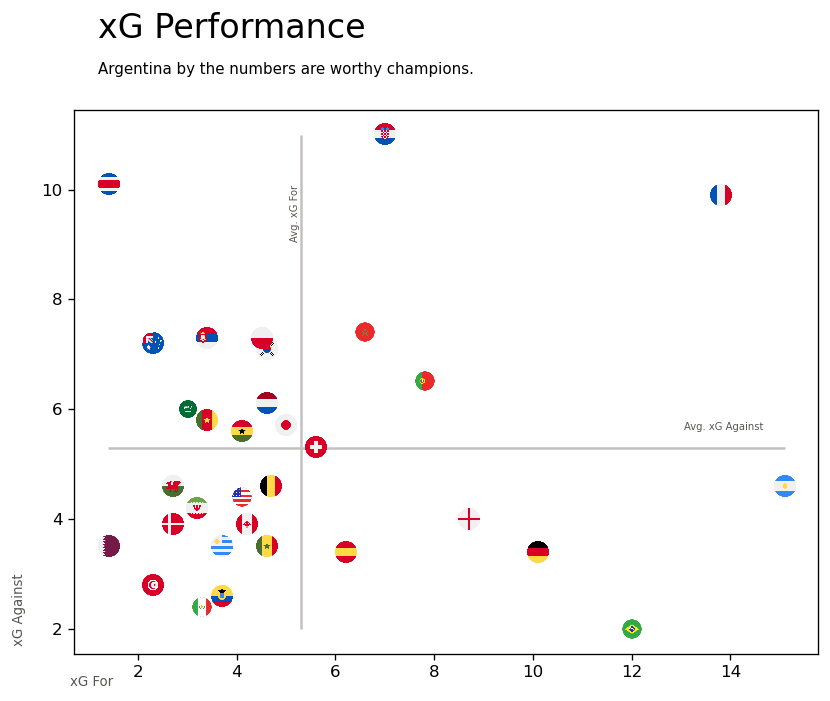

In [10]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
ax.scatter(semi['xG'], semi['xG Conceded'],color='gray')
for index, row in semi.iterrows():
    #Annotating the points using the images and the getImage function
    ab = AnnotationBbox(getImage(row['Path']), (row['xG'], row['xG Conceded']), frameon=False)
    ax.add_artist(ab)
plt.hlines(semi['xG Conceded'].mean(), semi['xG'].min(), semi['xG'].max(), color='#c2c1c0')
plt.vlines(semi['xG'].mean(), semi['xG Conceded'].min(), semi['xG Conceded'].max(), color='#c2c1c0')

## Title & comment
fig.text(.15,.98,'xG Performance',size=20)
fig.text(.15,.93,'Argentina by the numbers are worthy champions.', size=9)

## Avg line explanation
fig.text(.06,.14,'xG Against', size=8, color='#575654',rotation=90)
fig.text(.12,0.08,'xG For', size=8, color='#575654')

## Axes titles
fig.text(.76,.435,'Avg. xG Against', size=6, color='#575654')
fig.text(.350,.7,'Avg. xG For', size=6, color='#575654',rotation=90)

## Save plot
plt.savefig('pics/xGChart.png', dpi=1200, bbox_inches = "tight")




## Let's check the best dribblers in the world cup.

In [11]:
dataposs=pd.read_excel('data/World Cup Player Possession.xlsx')
dataposs

,Player,Last,Name,Unnamed: 3,Pos,Squad,Age,Born,90s,Touches,...,Att 3rd,Att Pen,Live,Succ,Att,Succ%,Mis,Dis,Rec,Prog
0,Brenden,Aaronson,NaN,NaN,MF,us United States,21,2000,1.2,78.0,...,30.0,7.0,78.0,2.0,11.0,18.2,8.0,4.0,53.0,4.0
1,Ali,Abdi,NaN,NaN,DF,tn Tunisia,28,1993,2.1,152.0,...,26.0,3.0,152.0,1.0,2.0,50.0,5.0,4.0,67.0,11.0
2,Salis,Abdul,Samed,NaN,MF,gh Ghana,22,2000,2.8,169.0,...,24.0,0.0,169.0,3.0,4.0,75.0,4.0,2.0,121.0,2.0
3,Saud,Abdulhamid,NaN,NaN,DFMF,sa Saudi Arabia,22,1999,3.0,150.0,...,54.0,5.0,150.0,2.0,4.0,50.0,4.0,1.0,74.0,10.0
4,Nawaf,Al,Abed,NaN,MF,sa Saudi Arabia,32,1990,1.0,51.0,...,28.0,4.0,51.0,1.0,2.0,50.0,6.0,5.0,41.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Piotr,Zieliński,NaN,NaN,MFFW,pl Poland,28,1994,3.6,178.0,...,43.0,3.0,178.0,1.0,4.0,25.0,2.0,1.0,113.0,4.0
676,Walker,Zimmerman,NaN,NaN,DF,us United States,29,1993,3.1,274.0,...,5.0,1.0,274.0,0.0,0.0,NaN,0.0,0.0,191.0,0.0
677,Andrija,Živković,NaN,NaN,DF,rs Serbia,25,1996,2.3,118.0,...,40.0,3.0,118.0,0.0,1.0,0.0,4.0,1.0,72.0,4.0
678,Hakim,Ziyech,NaN,NaN,FW,ma Morocco,29,1993,7.1,386.0,...,134.0,8.0,386.0,12.0,29.0,41.4,15.0,11.0,263.0,17.0


In [12]:
dataposs.Pos.value_counts()

DF      213
MF      179
FW      127
FWMF     53
GK       41
MFFW     32
MFDF     15
DFMF     12
FWDF      5
DFFW      3
Name: Pos, dtype: int64

In [13]:
# We will filter the data to concentrate on the attacking players who played at least 3 games and attempted at least 8 dribbles.
semiposs=dataposs
semiposs=semiposs[(semiposs['Pos']=='FW') | (semiposs['Pos']=='MF') | (semiposs['Pos']=='MFFW')  | (semiposs['Pos']=='FWMF')  | (semiposs['Pos']=='DFMF')  | (semiposs['Pos']=='MFDF')]
semiposs=semiposs[(semiposs['90s']>3) & (semiposs['Att']>8)]
#Get only the last name using some conditions because some players have separated last names.
semiposs['Full']=semiposs['Last']+semiposs['Name']
semi2=semiposs.apply(lambda x: x['Last'] if pd.isnull(x['Full']) else x['Full'],axis=1)
semiposs['Full']=semi2
semi3=semiposs.apply(lambda x:x['Player'] if pd.isnull(x['Full']) else x['Full'],axis=1)
semiposs['Full']=semi3
semiposs

,Player,Last,Name,Unnamed: 3,Pos,Squad,Age,Born,90s,Touches,...,Att Pen,Live,Succ,Att,Succ%,Mis,Dis,Rec,Prog,Full
68,Jude,Bellingham,NaN,NaN,MF,eng England,18,2003,4.6,324.0,...,14.0,324.0,6.0,13.0,46.2,8.0,6.0,234.0,30.0,Bellingham
80,Sofiane,Boufal,NaN,NaN,FW,ma Morocco,28,1993,5.3,199.0,...,11.0,199.0,14.0,27.0,51.9,14.0,5.0,144.0,14.0,Boufal
145,Rodrigo,De,Paul,NaN,MF,ar Argentina,28,1994,6.7,625.0,...,12.0,625.0,1.0,10.0,10.0,9.0,7.0,481.0,15.0,DePaul
148,Ousmane,Dembélé,NaN,NaN,FW,fr France,25,1997,4.8,241.0,...,16.0,241.0,9.0,23.0,39.1,8.0,6.0,179.0,17.0,Dembélé
151,Ángel,Di,María,NaN,MFFW,ar Argentina,34,1988,3.2,201.0,...,17.0,201.0,13.0,28.0,46.4,9.0,6.0,164.0,26.0,DiMaría
205,Cody,Gakpo,NaN,NaN,FWMF,nl Netherlands,23,1999,5.0,205.0,...,6.0,205.0,5.0,13.0,38.5,16.0,9.0,130.0,17.0,Gakpo
226,Antoine,Griezmann,NaN,NaN,MF,fr France,31,1991,6.0,380.0,...,14.0,380.0,4.0,10.0,40.0,6.0,9.0,247.0,20.0,Griezmann
257,Son,Heung-min,NaN,NaN,FWMF,kr Korea Republic,29,1992,4.0,158.0,...,19.0,158.0,3.0,15.0,20.0,8.0,6.0,107.0,25.0,Heung-min
297,Vinicius,NaN,NaN,NaN,FW,br Brazil,21,2000,3.3,132.0,...,19.0,132.0,5.0,15.0,33.3,8.0,11.0,105.0,22.0,Vinicius
329,Mateo,Kovačić,NaN,NaN,MF,hr Croatia,28,1994,7.1,521.0,...,13.0,521.0,11.0,20.0,55.0,10.0,7.0,402.0,16.0,Kovačić


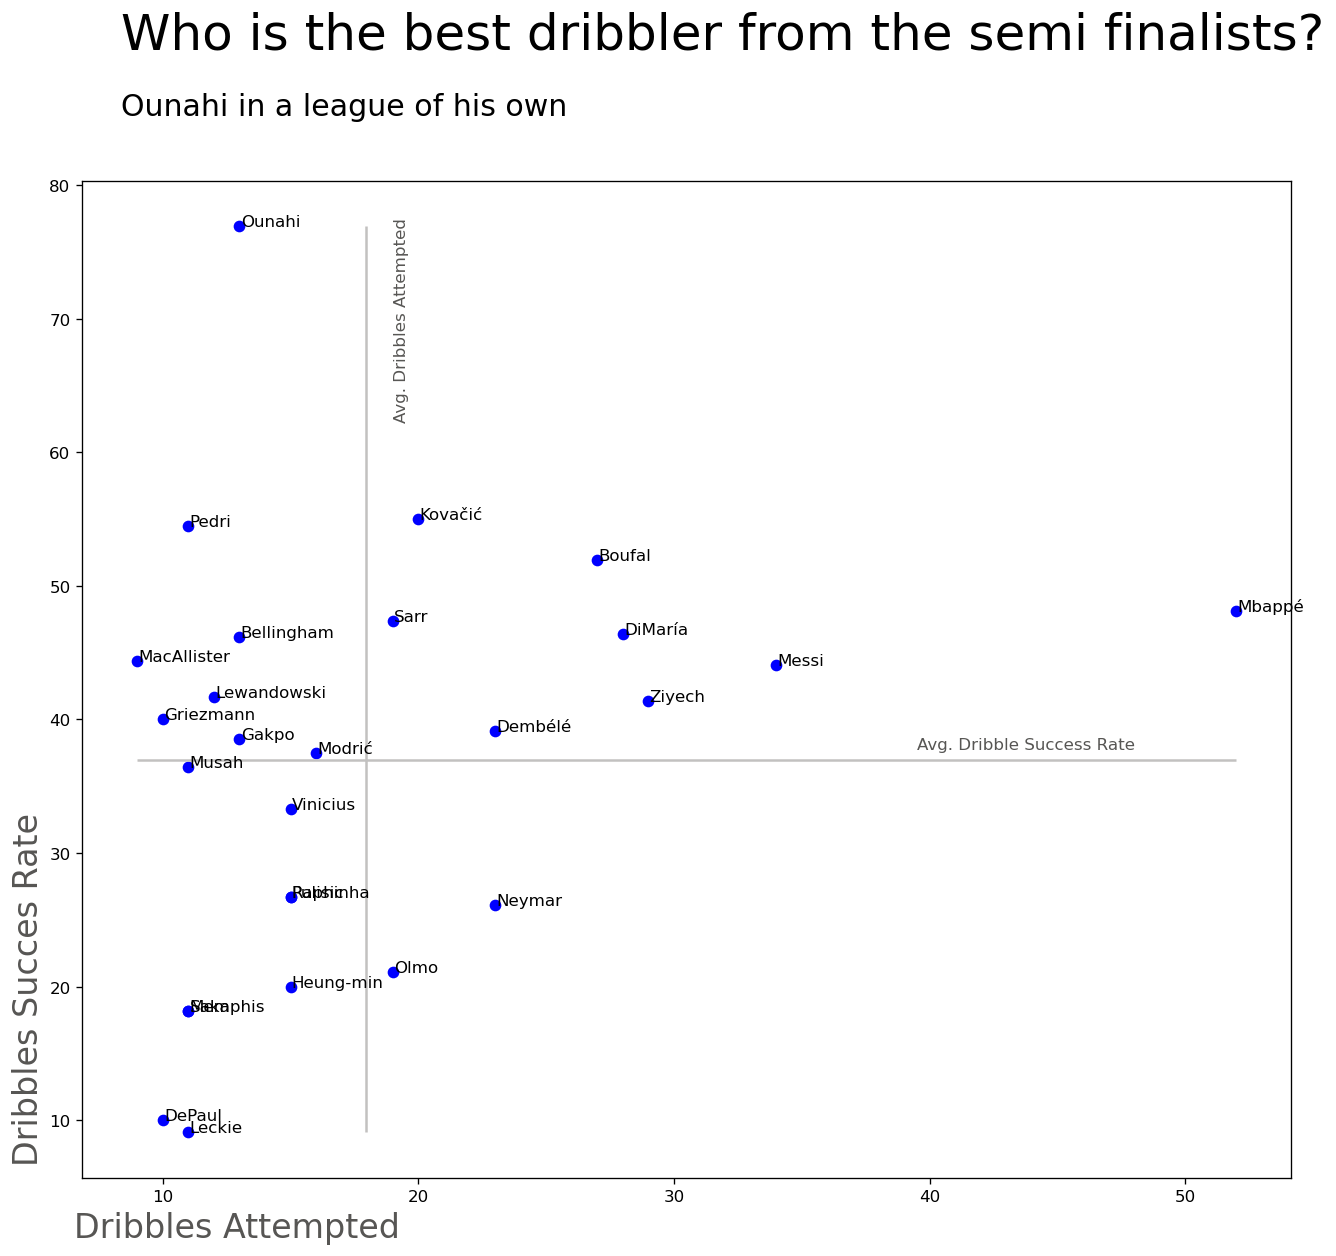

In [14]:
fig, ax = plt.subplots(figsize=(13,11), dpi=120)
ax.scatter(semiposs['Att'], semiposs['Succ%'],color='blue')
for i, txt in enumerate(semiposs.Full):
    ax.annotate(txt, (semiposs['Att'].iat[i]+0.05, semiposs['Succ%'].iat[i]))
plt.hlines(semiposs['Succ%'].mean(), semiposs['Att'].min(), semiposs['Att'].max(), color='#c2c1c0')
plt.vlines(semiposs['Att'].mean(), semiposs['Succ%'].min(), semiposs['Succ%'].max(), color='#c2c1c0')

## Title & comment
fig.text(.15,.98,'Who is the best dribbler from the semi finalists?',size=30)
fig.text(.15,.93,'Ounahi in a league of his own', size=18)

## Avg line explanation
fig.text(.08,.14,'Dribbles Succes Rate', size=20, color='#575654',rotation=90)
fig.text(.12,0.08,'Dribbles Attempted ', size=20, color='#575654')

## Axes titles
fig.text(.66,.45,'Avg. Dribble Success Rate ', size=10, color='#575654')
fig.text(.325,.7,'Avg. Dribbles Attempted', size=10, color='#575654',rotation=90)

## Save plot
plt.savefig('pics/Dribbles.png', dpi=1200, bbox_inches = "tight")



## Now we will focus on the goalkeepers by getting those who played at least 4 games.
## We will be plotting the post shot expected goals vs goals conceded to measure how well the goalkeepers performed in the world cup as saves don't necessarily reflect the quality of the shot faced unlike the PSxG.

In [15]:
datagk=pd.read_excel('data/World Cup GK.xlsx')
datagk=datagk[datagk['90s']>=4]
datagk['Name']=datagk['Player'].apply(lambda x: x if len(x)==1 else x.split(' ')[-1])
datagk

,Player,Pos,Squad,Age,Born,90s,GA,PKA,FK,CK,...,Att.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist,Name
0,Alisson,GK,br Brazil,29,1992,4.2,2,0,0,0,...,19,21.1,25.6,44,0,0.0,7,1.81,22.0,Alisson
5,Yassine Bounou,GK,ma Morocco,31,1991,6.3,5,0,0,0,...,56,62.5,46.6,92,5,5.4,6,1.00,12.7,Bounou
6,Diogo Costa,GK,pt Portugal,22,1999,5.0,6,0,0,2,...,35,37.1,39.6,47,3,6.4,8,1.60,15.9,Costa
12,Shūichi Gonda,GK,jp Japan,33,1989,4.3,4,1,0,0,...,26,61.5,45.7,61,4,6.6,0,0.00,8.4,Gonda
16,Dominik Livaković,GK,hr Croatia,27,1995,7.7,7,1,0,1,...,50,40.0,34.9,99,8,8.1,3,0.43,10.8,Livaković
17,Hugo Lloris,GK,fr France,35,1986,6.3,7,3,0,1,...,56,67.9,49.8,70,7,10.0,5,0.83,13.7,Lloris
19,Emiliano Martínez,GK,ar Argentina,29,1992,7.7,8,2,0,0,...,39,53.8,45.9,88,12,13.6,5,0.71,12.8,Martínez
20,Edouard Mendy,GK,sn Senegal,30,1992,4.0,7,0,0,1,...,26,26.9,30.1,64,3,4.7,2,0.50,11.8,Mendy
25,Andries Noppert,GK,nl Netherlands,28,1994,5.3,4,1,0,0,...,40,40.0,35.7,63,6,9.5,5,1.00,13.3,Noppert
29,Jordan Pickford,GK,eng England,28,1994,5.0,4,1,0,1,...,36,47.2,45.9,39,2,5.1,5,1.00,16.2,Pickford


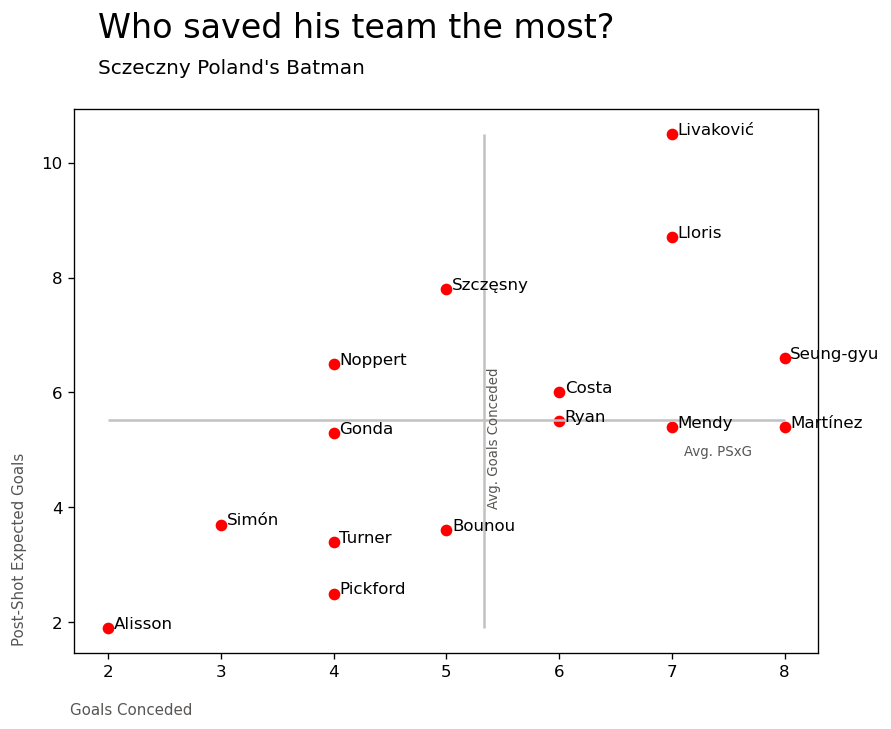

In [16]:
fig, ax = plt.subplots(figsize=(8,6), dpi=120)
ax.scatter(datagk['GA'], datagk['PSxG'],color='red')
for i, txt in enumerate(datagk.Name):
    ax.annotate(txt, (datagk['GA'].iat[i]+0.05, datagk['PSxG'].iat[i]))
plt.hlines(datagk['PSxG'].mean(), datagk['GA'].min(), datagk['GA'].max(), color='#c2c1c0')
plt.vlines(datagk['GA'].mean(), datagk['PSxG'].min(), datagk['PSxG'].max(), color='#c2c1c0')

## Title & comment
fig.text(.15,.98,'Who saved his team the most?',size=20)
fig.text(.15,.93,"Sczeczny Poland's Batman ", size=12)

## Avg line explanation
fig.text(.06,.14,'Post-Shot Expected Goals ', size=9, color='#575654',rotation=90)
fig.text(.12,0.04,'Goals Conceded ', size=9, color='#575654')

## Axes titles
fig.text(.76,.4,'Avg. PSxG ', size=8, color='#575654')
fig.text(.555,.33,'Avg. Goals Conceded', size=8, color='#575654',rotation=90)

## Save plot
plt.savefig('pics/GK.png', dpi=1200, bbox_inches = "tight")

## Now to see the creatives players of the world cup and focussing on those who played at least 4 games.

In [17]:
datapasses=pd.read_excel('data/World Cup Passes.xlsx')
#datapasses=datapasses[(datapasses['Squad']=='ar Argentina') | (datapasses['Squad']=='cr Croatia') | (datapasses['Squad']=='fr France') | (datapasses['Squad']=='ma Morocco')]
datapasses=datapasses[datapasses['90s']>=4]
datapasses

,Player,Pos,Squad,Age,Born,90s,Cmp,Att,Cmp%,TotDist,...,Cmp%.3,Ast,xAG,xA,A-xAG,KP,Final Third,PPA,CrsPA,Prog
10,Marcos Acuña,DFFW,ar Argentina,30,1991,4.1,167.0,217.0,77.0,2683.0,...,42.9,0,0.3,0.4,-0.3,5.0,9.0,2.0,0.0,9.0
11,Tyler Adams,MF,us United States,23,1999,4.0,241.0,271.0,88.9,4348.0,...,88.9,0,0.4,0.4,-0.4,2.0,23.0,3.0,0.0,17.0
18,Manuel Akanji,DF,ch Switzerland,26,1995,4.0,229.0,259.0,88.4,4725.0,...,76.2,0,0.1,0.1,-0.1,1.0,15.0,0.0,0.0,14.0
19,Nathan Aké,DF,nl Netherlands,27,1995,5.3,315.0,349.0,90.3,5204.0,...,60.6,0,0.0,0.1,0.0,0.0,29.0,1.0,0.0,19.0
25,Alisson,GK,br Brazil,29,1992,4.2,80.0,93.0,86.0,1590.0,...,50.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,Virgil van Dijk,DF,nl Netherlands,30,1991,5.3,311.0,356.0,87.4,6371.0,...,66.7,0,0.1,0.1,-0.1,2.0,7.0,1.0,0.0,15.0
627,Raphaël Varane,DF,fr France,29,1993,5.8,256.0,286.0,89.5,5125.0,...,60.5,0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,5.0
662,Granit Xhaka,MF,ch Switzerland,29,1992,4.0,215.0,243.0,88.5,3990.0,...,70.0,0,0.1,0.2,-0.1,2.0,21.0,3.0,0.0,25.0
667,Maya Yoshida,DF,jp Japan,33,1988,4.3,198.0,232.0,85.3,3969.0,...,55.6,1,0.4,0.0,0.6,1.0,3.0,0.0,0.0,6.0


In [18]:
datapasses

,Player,Pos,Squad,Age,Born,90s,Cmp,Att,Cmp%,TotDist,...,Cmp%.3,Ast,xAG,xA,A-xAG,KP,Final Third,PPA,CrsPA,Prog
10,Marcos Acuña,DFFW,ar Argentina,30,1991,4.1,167.0,217.0,77.0,2683.0,...,42.9,0,0.3,0.4,-0.3,5.0,9.0,2.0,0.0,9.0
11,Tyler Adams,MF,us United States,23,1999,4.0,241.0,271.0,88.9,4348.0,...,88.9,0,0.4,0.4,-0.4,2.0,23.0,3.0,0.0,17.0
18,Manuel Akanji,DF,ch Switzerland,26,1995,4.0,229.0,259.0,88.4,4725.0,...,76.2,0,0.1,0.1,-0.1,1.0,15.0,0.0,0.0,14.0
19,Nathan Aké,DF,nl Netherlands,27,1995,5.3,315.0,349.0,90.3,5204.0,...,60.6,0,0.0,0.1,0.0,0.0,29.0,1.0,0.0,19.0
25,Alisson,GK,br Brazil,29,1992,4.2,80.0,93.0,86.0,1590.0,...,50.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,Virgil van Dijk,DF,nl Netherlands,30,1991,5.3,311.0,356.0,87.4,6371.0,...,66.7,0,0.1,0.1,-0.1,2.0,7.0,1.0,0.0,15.0
627,Raphaël Varane,DF,fr France,29,1993,5.8,256.0,286.0,89.5,5125.0,...,60.5,0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,5.0
662,Granit Xhaka,MF,ch Switzerland,29,1992,4.0,215.0,243.0,88.5,3990.0,...,70.0,0,0.1,0.2,-0.1,2.0,21.0,3.0,0.0,25.0
667,Maya Yoshida,DF,jp Japan,33,1988,4.3,198.0,232.0,85.3,3969.0,...,55.6,1,0.4,0.0,0.6,1.0,3.0,0.0,0.0,6.0


In [ ]:
#path='logo/grizou.jfif'
#image = plt.imread(path)

# Create the OffsetImage object
#offset_image = OffsetImage(image, zoom=0.2)

fig, ax = plt.subplots(figsize=(13,11), dpi=120)
ax.scatter(datapasses['KP'], datapasses['xA'],color='green')
for i, txt in enumerate(datapasses.Player):
    ax.annotate(txt, (datapasses['KP'].iat[i]-0.1, datapasses['xA'].iat[i]))
  
plt.hlines(datapasses['xA'].mean(), datapasses['KP'].min(), datapasses['KP'].max(), color='#c2c1c0')
plt.vlines(datapasses['KP'].mean(), datapasses['xA'].min(), datapasses['xA'].max(), color='#c2c1c0')

## Title & comment
fig.text(.15,.98,'Who is the most creative player in the World Cup ?',size=30)
fig.text(.15,.93,"Griezmann with the french flair", size=18)

## Avg line explanation
fig.text(.01,.14,'Expected Assists', size=20, color='#575654',rotation=90)
fig.text(.12,0.02,'Key Passes ', size=20, color='#575654')

## Axes titles
fig.text(.76,.25,'Avg. xA ', size=10, color='#575654')
fig.text(.250,.6,'Avg. KP', size=10, color='#575654',rotation=90)

## Save plot
plt.savefig('pics/Assists.png', dpi=1200, bbox_inches = "tight")

## Finally the best defensive teams.

In [ ]:
datadef=pd.read_excel('data/World Cup Defense.xlsx')
datadef

In [ ]:
datapas=pd.read_excel('data/World Cup Team Passes.xlsx')
datapas

In [ ]:
PasRec=pd.DataFrame(columns=['Squad','Tackles Won','Progressive Passes'])
PasRec.Squad=datapas.Squad
PasRec['Tackles Won']=datadef['TklW']
PasRec['Progressive Passes']=datapas.Prog
PasRec

In [ ]:
PasRec['Path']=path+l['Teams']+'.png'

PasRec['Path']=PasRec['Path'].apply(lambda x: x.replace(' ',''))
PasRec

In [ ]:
PasRec.columns

In [ ]:
fig, ax = plt.subplots(figsize=(13,11), dpi=120)
ax.scatter(PasRec['Tackles Won'], PasRec['Progressive Passes'],color='white')
for index, row in PasRec.iterrows():
    ab = AnnotationBbox(getImage(row['Path']), (row['Tackles Won'], row['Progressive Passes']), frameon=False)
    ax.add_artist(ab)
plt.hlines(PasRec['Progressive Passes'].mean(), PasRec['Tackles Won'].min(), PasRec['Tackles Won'].max(), color='#c2c1c0')
plt.vlines(PasRec['Tackles Won'].mean(), PasRec['Progressive Passes'].min(), PasRec['Progressive Passes'].max(), color='#c2c1c0')

## Title & comment
fig.text(.15,.98,'Tackles Won vs Progressive Passes',size=30)
fig.text(.15,.93,'Croatia are really good thanks to their elegant midfield.', size=18)

## Avg line explanation
fig.text(.08,.14,'Progressive Passes', size=18, color='#575654',rotation=90)
fig.text(.12,0.05,'Tackles Won', size=18, color='#575654')

## Axes titles
fig.text(.76,.35,'Avg. Progressive Passes', size=10, color='#575654')
fig.text(.350,.5,'Avg. Tackles Won', size=10, color='#575654',rotation=90)

## Save plot
plt.savefig('pics/InterceptionsProgPasses.png', dpi=1200, bbox_inches = "tight")


##### 